<a href="https://colab.research.google.com/github/HUGOXBACA/ANALOG-CIRCUIT-DESIGN-ANALYSIS-4030/blob/main/UCR_GOOGLE_REU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Rail Grade-Crossing Safety***

August 5th, 2023: Hugo: I have found some Federal DOT public data that seems interesting. Therefore I will be doing some exploratory data analysis on this data set and see what I find.

Link to dataset: [Highway-Rail Grade Crossing Accident Data](https://data.transportation.gov/Railroads/Highway-Rail-Grade-Crossing-Accident-Data-Form-57-/7wn6-i5b9)

In [1]:
!pip install pandas
!pip install sodapy

In [2]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.transportation.gov", None)

#client = Socrata( data.transportation.gov,
 #                 '1hCte9vYL7IpE7pFTGR1cbn8y',
  #                username="hugo.baca4515@coyote.csusb.edu",
   #               password="")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("7wn6-i5b9", limit=20)

# Convert to pandas DataFrame
HRGC_data_raw = pd.DataFrame.from_records(results)


In [ ]:
#let's see what we get back
print(HRGC_data_raw)

In [ ]:
from numpy.core.fromnumeric import sort

column_headers = list(HRGC_data_raw.columns.values)

column_headers.sort()

print("The Column Headers:")
for header in column_headers:
  print(header)

So I extracted the colnames, but now lets try to get each label description as to better understand the measurements.

I found this pdf with explainations:  [HIGHWAY-RAIL GRADE CROSSING ACCIDENT/INCIDENT
DATA FILE STRUCTURE AND FIELD INPUT SPECIFICATIONS](https://data.transportation.gov/api/views/icqf-xf4w/files/531a212f-6b94-4403-9876-a6933a1469aa?download=true&filename=gxirfile_EFFECTIVE_060111%20(24).pdf)

I will try to create a description dictionary.

In [5]:
#from google.colab import files
#uploaded = files.upload()


In [ ]:
from numpy import NaN
dictionary_data_raw = pd.read_excel('Form_57_Data_Dictionary.xlsx')

dictionary = pd.DataFrame.from_records(dictionary_data_raw)

dictionary.columns.values

dictionary = dictionary.filter(items=['Display Name', 'Description'])

print(dictionary)

In [ ]:
# Create a dictionary to store the corresponding names and descriptions
name_to_description = {}
for index, row in dictionary.iterrows():
    name_to_description[row['Display Name']] = row['Description']

# Get the description for the variable 'report year'
description = name_to_description['Report Year']
print(description)

#Personal Prefence: Allows me to quickly pull descriptions for variable.

In [ ]:
#Explore for NA's, missing data, and redunnacy

isnaValues = HRGC_data_raw.isna()
print(isnaValues)

# Check for NA values
missing_values = HRGC_data_raw.isna().sum()

#check for null values
missing_data = HRGC_data_raw.isnull().sum()
print(missing_data)

# Check for missing data
for column in HRGC_data_raw.columns:
    if missing_values[column] > 0:
        print(f"The column {column} has {missing_values[column]} missing values.")

# Check for redundancy
for column in HRGC_data_raw.columns:
    if HRGC_data_raw[column].duplicated().sum() > 0:
        print(f"The column {column} has {HRGC_data_raw[column].duplicated().sum()} duplicate values.")

### Crossing Inventory Data

Found another interesting data set:https://data.transportation.gov/Railroads/Crossing-Inventory-Data-Form-71-Current/m2f8-22s6



In [ ]:
#lets try to clean up raw data

# Calculate the percentage of missing values in each column
missing_values = HRGC_data_raw.isna().mean()

# Drop columns with more than 30% missing values
drop_list = [column for column in missing_values.index if missing_values[column] > 0.3]

# Drop the columns
HRGC_data_clean = HRGC_data_raw.drop(columns=drop_list)

print(f"\n The Raw Data Frame has {len(HRGC_data_raw.columns)} labels.")
print(f"\n The Clean Data Frame now has {len(HRGC_data_clean.columns)} labels.")
print("\n Count of labels dropped: \n", len(HRGC_data_raw.columns) - len(HRGC_data_clean.columns) )
print("\n Deleted Labels: \n", drop_list)
print("\n Cleaned Data Labels: \n", HRGC_data_clean.columns.values)

In [26]:

# importing the modules
from IPython.display import display

#HRGC_data_clean.style
#display(HRGC_data_clean)

from tabulate import tabulate
print(tabulate(HRGC_data_clean, headers = 'keys', tablefmt = 'psql'))
print(HRGC_data_clean.dtypes)

+----+----------------+-------------------------------------------+--------+------------------+----------------+-----------------+---------------------------+-------------------------------------------+--------------------------------+---------------------------+----------------------------+-------------------+-------------------------+---------+-------+--------+----------+--------+----------+------------------+--------------+--------------+-------------+-------------+--------------+------------------+---------------------+-----------------+-------------------+---------------+-------------------------+------------------------+--------------------+---------------------------+------------------------------+-------------------------+------------------------+---------------------------+-----------------------+---------------------------------------+-------------------------+---------------------+---------------+------------------+--------------+------------------------+--------------------

<ipython-input-27-9a152e71ee2f>:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()
<ipython-input-27-9a152e71ee2f>:12: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
<ipython-input-27-9a152e71ee2f>:12: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)


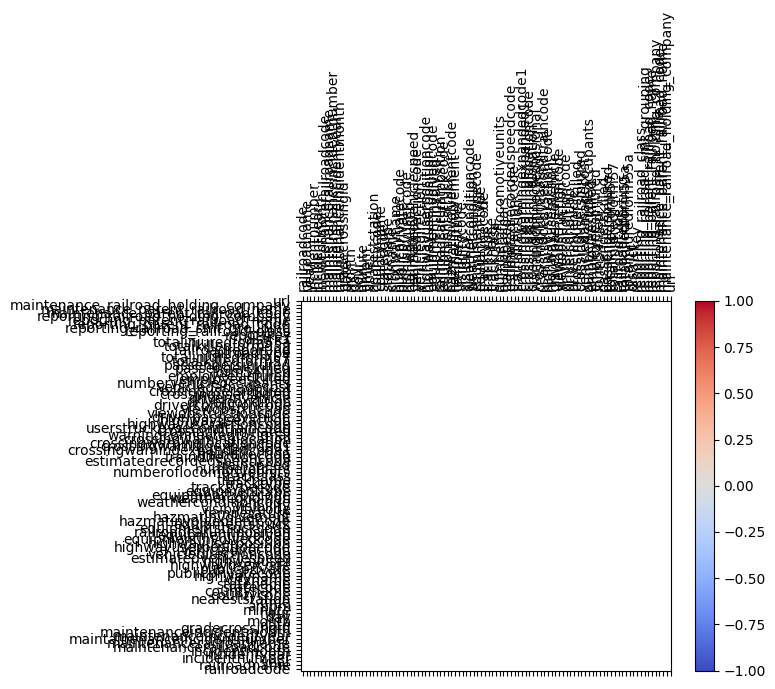

In [27]:
#lets make a corr plot of all vars in the dataframe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = HRGC_data_clean


corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [ ]:
!pip install pandas
!pip install sodapy

In [ ]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.transportation.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.transportation.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("m2f8-22s6", limit=2000)

# Convert to pandas DataFrame
Crossing_Inventory_Data_raw__df = pd.DataFrame.from_records(results)

In [ ]:
print(Crossing_Inventory_Data_raw__df)

In [ ]:
from numpy.core.fromnumeric import sort

column_headers_2 = list(Crossing_Inventory_Data_raw__df.columns.values)

column_headers_2.sort()

print("The Column Headers:")
for header in column_headers_2:
  print(header)

In [ ]:
#Explore for NA's, missing data, and redunnacy

isnaValues = Crossing_Inventory_Data_raw__df.isna()
print(isnaValues)

# Check for NA values
missing_values = Crossing_Inventory_Data_raw__df.isna().sum()

#check for null values
missing_data = Crossing_Inventory_Data_raw__df.isnull().sum()
print(missing_data)

# Check for missing data
for column in Crossing_Inventory_Data_raw__df.columns:
    if missing_values[column] > 0:
        print(f"The column {column} has {missing_values[column]} missing values.")

# Check for redundancy
for column in Crossing_Inventory_Data_raw__df.columns:
    if Crossing_Inventory_Data_raw__df[column].duplicated().sum() > 0:
        print(f"The column {column} has {Crossing_Inventory_Data_raw__df[column].duplicated().sum()} duplicate values.")

In [ ]:
#lets try to clean up raw data

# Calculate the percentage of missing values in each column
missing_values = Crossing_Inventory_Data_raw__df.isna().mean()

# Drop columns with more than 30% missing values
drop_list = [column for column in missing_values.index if missing_values[column] > 0.3]

# Drop the columns
CID_data_clean = Crossing_Inventory_Data_raw__df.drop(columns=drop_list)

print(f"\n The Raw Data Frame has {len(Crossing_Inventory_Data_raw__df.columns)} labels.")
print(f"\n The Clean Data Frame now has {len(Crossing_Inventory_Data_raw__df.columns)} labels.")
print("\n Count of labels dropped: \n", len(Crossing_Inventory_Data_raw__df.columns) - len(CID_data_clean.columns) )
print("\n Deleted Labels: \n", drop_list)
print("\n Cleaned Data Labels: \n", CID_data_clean.columns.values)

### Rail Equipment Accident/Incident Data (Form 54)


In [ ]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.transportation.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.transportation.gov,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("85tf-25kj", limit=2000)

# Convert to pandas DataFrame
REID = pd.DataFrame.from_records(results)

In [ ]:
from numpy.core.fromnumeric import sort

column_headers_2 = list(REID.columns.values)

column_headers_2.sort()

print("The Column Headers:")
for header in column_headers_2:
  print(header)

  #Explore for NA's, missing data, and redunnacy

isnaValues = REID.isna()
print(isnaValues)

# Check for NA values
missing_values = REID.isna().sum()

#check for null values
missing_data = REID.isnull().sum()
print(missing_data)

# Check for missing data
for column in REID.columns:
    if missing_values[column] > 0:
        print(f"The column {column} has {missing_values[column]} missing values.")

# Check for redundancy
for column in REID.columns:
    if REID[column].duplicated().sum() > 0:
        print(f"The column {column} has {REID[column].duplicated().sum()} duplicate values.")

#lets try to clean up raw data

# Calculate the percentage of missing values in each column
missing_values = REID.isna().mean()

# Drop columns with more than 30% missing values
drop_list = [column for column in missing_values.index if missing_values[column] > 0.3]

# Drop the columns
REID_data_clean = REID.drop(columns=drop_list)

print(f"\n The Raw Data Frame has {len(REID.columns)} labels.")
print(f"\n The Clean Data Frame now has {len(REID.columns)} labels.")
print("\n Count of labels dropped: \n", len(REID.columns) - len(REID_data_clean.columns) )
print("\n Deleted Labels: \n", drop_list)
print("\n Cleaned Data Labels: \n", CID_data_clean.columns.values)

### Rail Equipment Accident/Incident Data (Form 54) Subset – Unique Train Accidents (Not at Grade Crossings)

In [ ]:
import pandas as pd
from sodapy import Socrata

client = Socrata("data.transportation.gov", None)

results = client.get("byy5-w977", limit=2000)

REID_NON_GRADE = pd.DataFrame.from_records(results)

In [ ]:
from numpy.core.fromnumeric import sort

column_headers_2 = list(REID_NON_GRADE.columns.values)

column_headers_2.sort()

print("The Column Headers:")
for header in column_headers_2:
  print(header)

  #Explore for NA's, missing data, and redunnacy

isnaValues = REID_NON_GRADE.isna()
print(isnaValues)

# Check for NA values
missing_values = REID_NON_GRADE.isna().sum()

#check for null values
missing_data = REID_NON_GRADE.isnull().sum()
print(missing_data)

# Check for missing data
for column in REID_NON_GRADE.columns:
    if missing_values[column] > 0:
        print(f"The column {column} has {missing_values[column]} missing values.")

# Check for redundancy
for column in REID_NON_GRADE.columns:
    if REID_NON_GRADE[column].duplicated().sum() > 0:
        print(f"The column {column} has {REID_NON_GRADE[column].duplicated().sum()} duplicate values.")

#lets try to clean up raw data

# Calculate the percentage of missing values in each column
missing_values = REID_NON_GRADE.isna().mean()

# Drop columns with more than 30% missing values
drop_list = [column for column in missing_values.index if missing_values[column] > 0.3]

# Drop the columns
CID_data_clean = REID_NON_GRADE.drop(columns=drop_list)

print(f"\n The Raw Data Frame has {len(REID_NON_GRADE.columns)} labels.")
print(f"\n The Clean Data Frame now has {len(REID_NON_GRADE.columns)} labels.")
print("\n Count of labels dropped: \n", len(REID_NON_GRADE.columns) - len(CID_data_clean.columns) )
print("\n Deleted Labels: \n", drop_list)
print("\n Cleaned Data Labels: \n", CID_data_clean.columns.values)

The Column Headers:
:@computed_region_8fe2_rd7y
:@computed_region_m2nu_4dib
accident_type_code
accidentcause
accidentcausecode
accidentmonth
accidentnumber
accidenttype
accidentyear
adjunct_code_1
adjunct_code_2
adjunct_code_3
adjunctname1
adjunctname2
adjunctname3
brakemenonduty
cabooses
causingcarinitials
causingcarloaded
causingcarnumber
causingcarposition
class
classcode
conductorsonduty
contributingaccidentcause
contributingaccidentcausecode
countycode
countyname
date
day
derailedcabooses
derailedemptyfreightcars
derailedemptypassengercars
derailedheadendlocomotives
derailedloadedfreightcars
derailedloadedpassengercars
derailedmidtrainmanuallo
derailedmidtrainremotelo
derailedrearendmanualloc
derailedrearendremoteloc
district
division
divisioncode
emptyfreightcars
emptypassengercars
engineersonduty
equipment_type_code
equipmentattended
equipmentdamagecost
equipmenttype
firemenonduty
firstcarinitials
firstcarloaded
firstcarnumber
firstcarposition
grosstonnage
gxid
hazmatcars
hazmat

### Injury/Illness Summary - Operational Data (Form 55)


In [ ]:
import pandas as pd
from sodapy import Socrata

client = Socrata("data.transportation.gov", None)
results = client.get("m8i6-zdsy", limit=2000)

# Convert to pandas DataFrame
illnessSummary = pd.DataFrame.from_records(results)

### Injury/Illness Summary - Casualty Data (Form 55a)

In [ ]:
import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.transportation.gov", None)

results = client.get("rash-pd2d", limit=2000)

# Convert to pandas DataFrame
illnessSummary_Casualty = pd.DataFrame.from_records(results)